# Note
In chapter 2, we still explain what we can look into, while in chapter 3, we show how to do it. Still, for some charts, I used code to collect data. This code can be found here. If you are looking for the code and just want to get started, it is maybe better to start with code of chapter 3.

## 2.2 - How to get to industry classification

In [2]:
import yfinance as yf
import pandas as pd
nvda  = pd.Series(yf.Ticker("NVDA").info)
nvda.sector

'Technology'

### 2.2.2 sectors and economic cycles
This is the code for Figure 2.6

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

def plot_stock_prices(tickers, start_date, end_date):
    """
    Fetches stock price data for specified tickers over a date range and plots the prices.

    Parameters:
        tickers (list of str): Stock tickers to retrieve data for.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Fetch historical data for each ticker
    stock_data = yf.download(tickers, start=start_date, end=end_date)['Close']

    # Plot the stock price data
    plt.figure(figsize=(10, 6))
    for ticker in tickers:
        plt.plot(stock_data.index, stock_data[ticker], label=ticker)

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.title(f'Stock Prices from {start_date} to {end_date}')
    plt.legend()
    plt.grid(True)
    plt.show()


[*********************100%***********************]  3 of 3 completed


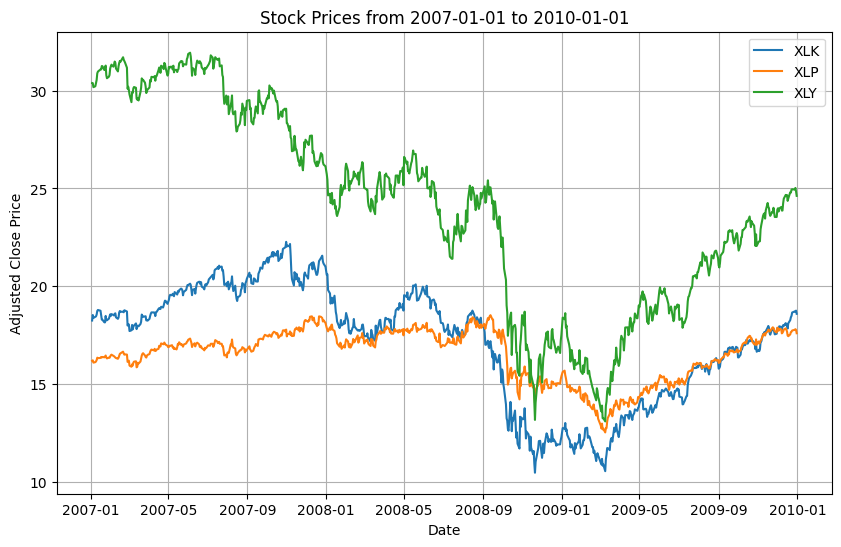

In [8]:
# XLK: Technology, XLY Consumer Discretionary, XLP: Consumer Staples
tickers = ['XLK', 'XLP', 'XLY']  # Replace with your desired tickers
start_date = '2007-01-01'
end_date = '2010-01-01'
plot_stock_prices(tickers, start_date, end_date)

### Collect ratios method
to be used later for getting the ratios

In [9]:
import pandas as pd
import yfinance as yf

def collect_ratios(tickers: list, ratios: list):
    rows = []
    
    for ticker in tickers:
        info = yf.Ticker(ticker).info
        row = [ticker] + [info.get(ratio, None) for ratio in ratios]
        rows.append(row)

    return pd.DataFrame(rows, columns=["Ticker"] + ratios)

## Liquidity ratios
Table 2.4 and Table 2.5

In [10]:
collect_ratios(["WMT", "MO", "NVDA", "CRM"], ["sector", "industry", "currentRatio", "quickRatio"])

,Ticker,sector,industry,currentRatio,quickRatio
0,WMT,Consumer Defensive,Discount Stores,0.780,0.185
1,MO,Consumer Defensive,Tobacco,0.571,0.468
2,NVDA,Technology,Semiconductors,3.388,2.857
3,CRM,Technology,Software - Application,1.069,0.899


In [11]:
collect_ratios(["WMT", "COST", "TGT", "DLTR"], ["sector", "industry", "currentRatio", "quickRatio"])

,Ticker,sector,industry,currentRatio,quickRatio
0,WMT,Consumer Defensive,Discount Stores,0.780,0.185
1,COST,Consumer Defensive,Discount Stores,1.015,0.472
2,TGT,Consumer Defensive,Discount Stores,0.935,0.152
3,DLTR,Consumer Defensive,Discount Stores,1.044,0.122


# Debt
Table 2.6

In [12]:
collect_ratios(["AAPL","WMT","NVDA"], ["sector", "industry", "debtToEquity"])

,Ticker,sector,industry,debtToEquity
0,AAPL,Technology,Consumer Electronics,146.994
1,WMT,Consumer Defensive,Discount Stores,74.138
2,NVDA,Technology,Semiconductors,12.267


In [11]:
# check on debt divided by equity over the years
company = "AAPL"
company = yf.Ticker(company)
for i in range(0,4):
    print(f"{company.balance_sheet.iloc[:,i].name}: {company.balance_sheet.iloc[:,i]['Total Debt'] / company.balance_sheet.iloc[:,i]['Stockholders Equity']}")

2023-09-30 00:00:00: 1.9941750072410132
2022-09-30 00:00:00: 2.6144616356173036
2021-09-30 00:00:00: 2.163924552226977
2020-09-30 00:00:00: 1.871439722064923


### interest coverage ratio

In [12]:
def last_interest_coverage_ratio(company):
    print(f"interest coverage ratio: {company.income_stmt.iloc[:,0]['EBIT'] / company.income_stmt.iloc[:,0]['Interest Expense']}")
    
last_interest_coverage_ratio(yf.Ticker('MSFT'))
last_interest_coverage_ratio(yf.Ticker('WMT'))

interest coverage ratio: 46.38160569105691
interest coverage ratio: 9.143123369362653


### Earnings

In [15]:
# calcuating PE yourself
microsoft = pd.Series(yf.Ticker("MSFT").info)
price = microsoft.currentPrice
EPS = microsoft.trailingEps
PE = round(price / EPS, 2)
print (PE)

36.35


In [16]:
microsoft.trailingPE

36.350853

In [17]:
microsoft.trailingEps

12.94

# Valuation

In [54]:
collect_ratios(["NVDA", "AAPL", "SRE", "WMT", "KO"], ["forwardPE", "trailingPE", "trailingPegRatio", "priceToSalesTrailing12Months", "priceToBook", "beta"])


,Ticker,forwardPE,trailingPE,trailingPegRatio,priceToSalesTrailing12Months,priceToBook,beta
0,NVDA,34.398060,45.716130,1.7572,23.271797,41.221640,2.122
1,AAPL,24.539108,31.763239,1.8515,7.607310,45.609480,1.211
2,SRE,14.951362,16.890108,2.0331,3.755096,1.629075,0.656
3,WMT,35.834560,41.653847,3.7202,1.138319,9.289936,0.693
4,KO,24.023570,28.654617,4.4148,6.549577,11.719777,0.464


In [55]:
collect_ratios(["NVDA", "INTC", "AMD"], ["forwardPE", "trailingPE", "trailingPegRatio", "priceToSalesTrailing12Months", "priceToBook", "beta"])

,Ticker,forwardPE,trailingPE,trailingPegRatio,priceToSalesTrailing12Months,priceToBook,beta
0,NVDA,34.398060,45.71613,1.7572,23.271797,41.22164,2.122
1,INTC,20.680410,NaN,NaN,1.649606,0.87717,1.113
2,AMD,22.782354,84.81022,0.5931,6.788845,3.24399,1.993


In [22]:
# price to book - calcute it yourself
price = nvda.currentPrice
bv = nvda["bookValue"]
price_book = price/bv
price_book

41.22164048865619

# Profitability

In [23]:
microsoft = yf.Ticker("MSFT")   
print(f'ROA: {microsoft.income_stmt["2023-06-30"]["Net Income"] / microsoft.balance_sheet["2023-06-30"]["Total Assets"] * 100}%')
print(f'ROE: {microsoft.income_stmt["2023-06-30"]["Net Income"] / microsoft.balance_sheet["2023-06-30"]["Stockholders Equity"] * 100}%')
print(f'Profit Margin: {microsoft.income_stmt["2023-06-30"]["Net Income"] / microsoft.income_stmt["2023-06-30"]["Total Revenue"] * 100}%')


ROA: 17.5643726819038%
ROE: 35.088714643856406%
Profit Margin: 34.14623787839464%


In [37]:
print(f'Profit Margin: {microsoft.income_stmt["2023-06-30"]["Total Revenue"]  / microsoft.balance_sheet["2023-06-30"]["Total Assets"] * 100}%')


Profit Margin: 51.43867603938094%


# Efficiency
Not explicitly covered in the book, but still useful to look at

In [24]:
microsoft = yf.Ticker("MSFT")   
print(f'asset turnover ratio:  {microsoft.income_stmt["2023-06-30"]["Total Revenue"]  / microsoft.balance_sheet["2023-06-30"]["Total Assets"]}')


asset turnover ratio:  0.5143867603938094


## Dividend
Table 2.10

In [25]:
training_set = ["MSFT", "WMT", "NVDA", "SRE", "AAPL", "MO", "VICI", "RBI.VI"]
collect_ratios(training_set, ["sector", "industry", "dividendYield", "payoutRatio"])

,Ticker,sector,industry,dividendYield,payoutRatio
0,MSFT,Technology,Software - Infrastructure,0.71,0.2442
1,WMT,Consumer Defensive,Discount Stores,0.96,0.3665
2,NVDA,Technology,Semiconductors,0.03,0.0129
3,SRE,Utilities,Utilities - Diversified,3.36,0.5505
4,AAPL,Technology,Consumer Electronics,0.51,0.1558
5,MO,Consumer Defensive,Tobacco,6.89,0.6779
6,VICI,Real Estate,REIT - Diversified,5.50,0.6850
7,RBI.VI,Financial Services,Banks - Regional,4.06,0.4297


### Additional helper
Sometimes it is nice know when last dividend has been paid for a stock

In [28]:
ticker = yf.Ticker(ticker = "AAPL")
info = pd.Series(ticker.get_info())
pd.to_datetime(info.lastDividendDate, unit='s')

Timestamp('2025-05-12 00:00:00')

In [29]:
ticker.calendar

{'Dividend Date': datetime.date(2025, 5, 15),
 'Ex-Dividend Date': datetime.date(2025, 5, 12),
 'Earnings Date': [datetime.date(2025, 7, 30), datetime.date(2025, 8, 4)],
 'Earnings High': 1.51,
 'Earnings Low': 1.34,
 'Earnings Average': 1.42413,
 'Revenue High': 90104000000,
 'Revenue Low': 86919000000,
 'Revenue Average': 88630845280}

In [31]:
from datetime import datetime, timedelta

ticker = yf.Ticker(ticker="AAPL")
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = datetime.now() + timedelta(days=-365)
hist = ticker.history(start=start_date,end=end_date)
a = hist[hist["Dividends"] > 0][['Dividends']]
a

,Dividends
Date,
2024-08-12 00:00:00-04:00,0.25
2024-11-08 00:00:00-05:00,0.25
2025-02-10 00:00:00-05:00,0.25
2025-05-12 00:00:00-04:00,0.26


# Ownership


In [37]:
import pandas as pd
import yfinance as yf
ticker = yf.Ticker(ticker = "NVDA")
ndva = pd.Series(ticker.get_info())

In [38]:
ndva.marketCap

3456210829312

In [39]:
shares = ndva.sharesOutstanding
print(f"Shares Outstanding: {shares}. Market Value: {shares*ndva.previousClose:.2f}%")

Shares Outstanding: 24387600384. Market Value: 3414020177756.16%


### Insider purchases
Table 2.11

In [40]:
ticker.get_insider_purchases()

,Insider Purchases Last 6m,Shares,Trans
0,Purchases,3914505.0,17
1,Sales,2564508.0,14
2,Net Shares Purchased (Sold),1349997.0,31
3,Total Insider Shares Held,1057007872.0,<NA>
4,% Net Shares Purchased (Sold),0.001,<NA>
5,% Buy Shares,0.004,<NA>
6,% Sell Shares,0.002,<NA>


# Sustainability
Table 2.12

In [41]:
import yfinance as yf
info = yf.Ticker("NVDA")
info.sustainability

,esgScores
maxAge,86400
totalEsg,12.46
environmentScore,2.73
socialScore,4.08
governanceScore,5.65
ratingYear,2025
ratingMonth,5
highestControversy,2.0
peerCount,118
esgPerformance,LAG_PERF


In [44]:
# helper: transpose results
cola = "KO"
cola_y = yf.Ticker(cola)
esg_data = pd.DataFrame.transpose(cola_y.sustainability)
esg_data['company_ticker'] = str(cola_y.ticker)
esg_data


,maxAge,totalEsg,environmentScore,socialScore,governanceScore,ratingYear,ratingMonth,highestControversy,peerCount,esgPerformance,...,furLeather,gambling,gmo,militaryContract,nuclear,pesticides,palmOil,coal,tobacco,company_ticker
esgScores,86400,23.89,9.24,10.29,4.35,2025,5,3.0,224,AVG_PERF,...,False,False,False,False,False,False,False,False,False,KO


# Analysis

In [48]:
ticker.recommendations_summary

,period,strongBuy,buy,hold,sell,strongSell
0,0m,12,45,6,1,0
1,-1m,12,44,6,1,0
2,-2m,12,44,7,1,0
3,-3m,11,47,5,0,0


In [49]:
training_set = ["AAPL", "MSFT", "NVDA", "CRM"]
collect_ratios(training_set, ['currentPrice', 'targetMeanPrice', 'targetMedianPrice', 'targetHighPrice', 'targetLowPrice','recommendationMean', 'recommendationKey', 'numberOfAnalystOpinions'])

,Ticker,currentPrice,targetMeanPrice,targetMedianPrice,targetHighPrice,targetLowPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions
0,AAPL,203.92,228.85326,232.5,300.0,170.62,2.10870,buy,40
1,MSFT,470.38,509.11360,500.0,650.0,429.86,1.43333,strong_buy,50
2,NVDA,141.72,172.02219,175.0,220.0,100.00,1.43750,strong_buy,55
3,CRM,274.51,354.25232,360.0,442.0,225.00,1.70690,buy,52


ValueError: The scaled sum of the connected flows is 115, which is not within the tolerance (1e-06)

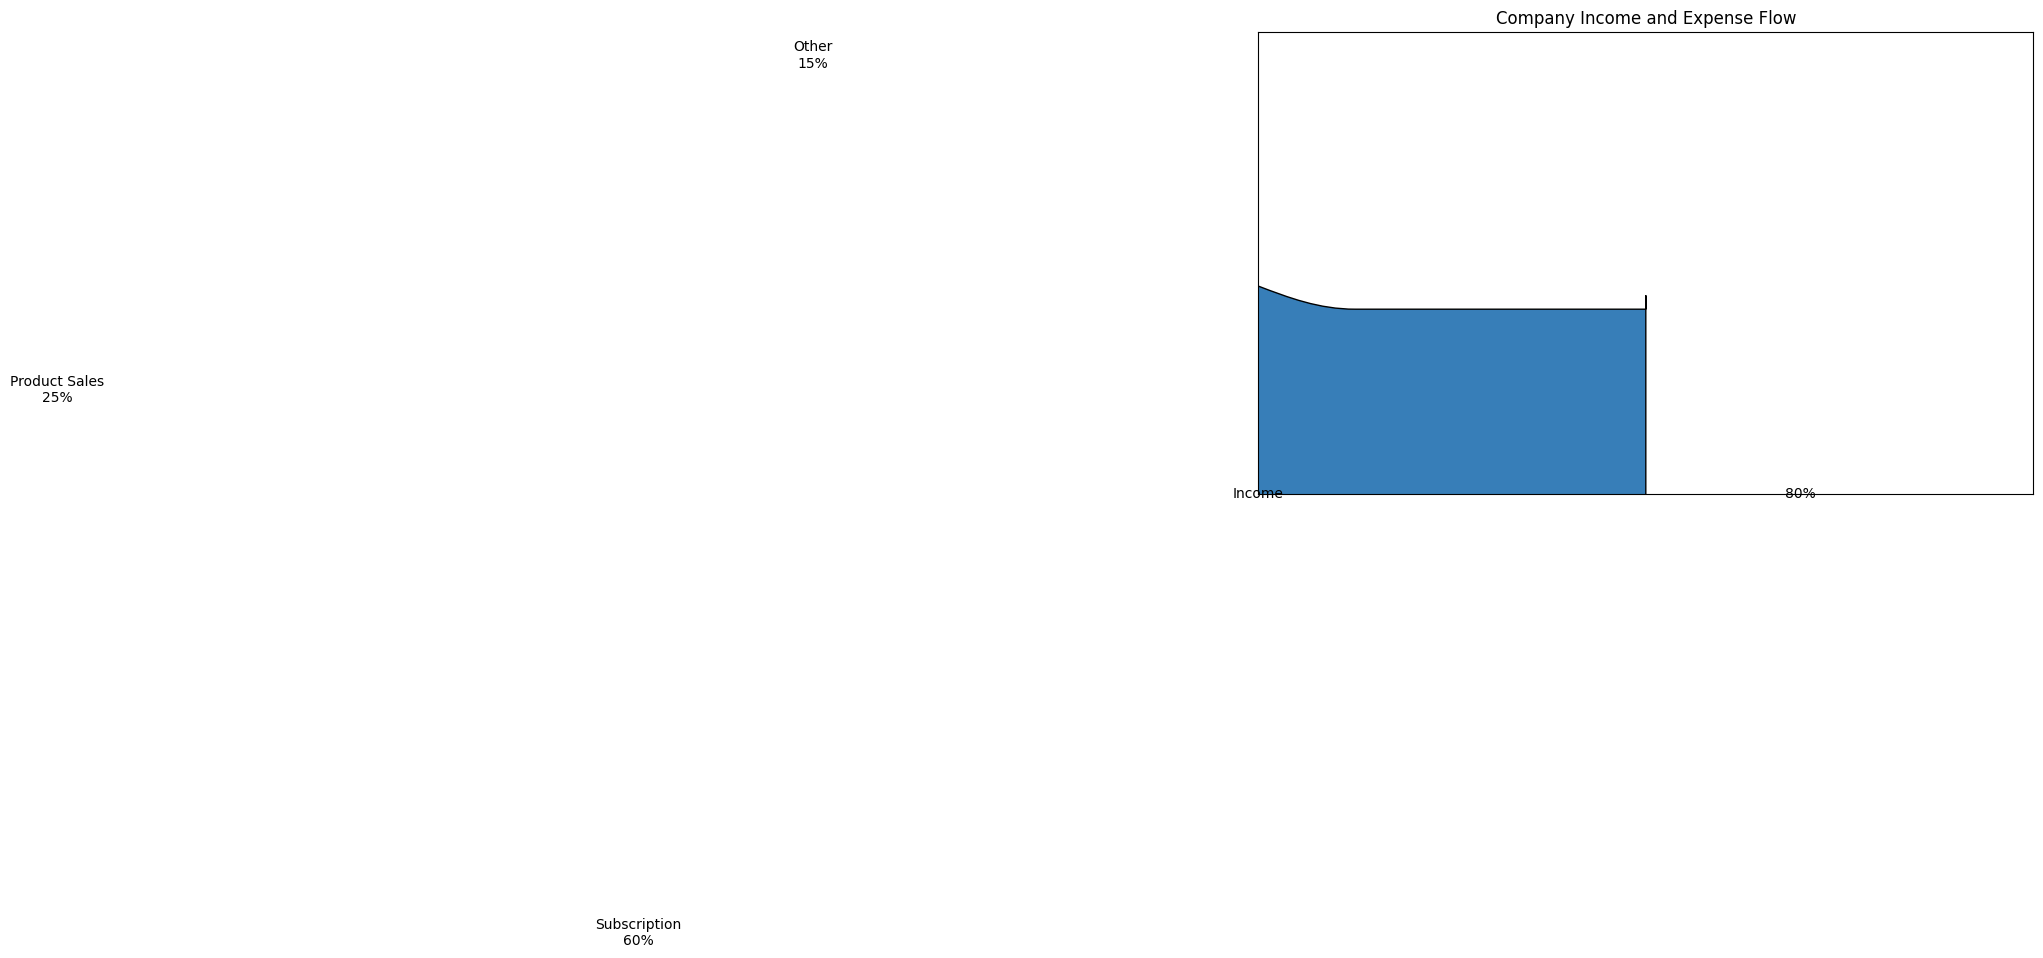

In [33]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Create a new figure and axes for the plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Company Income and Expense Flow")

# Create the Sankey diagram
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=180,
                format='%.0f', unit='%')

# Add the flows to the Sankey diagram
sankey.add(flows=[25, 15, 60, -80],
           labels=['Product Sales', 'Other', 'Subscription', ''],
           orientations=[0, 1, -1, 0],
           pathlengths=[0.25, 0.25, 0.25, 0.25],
           patchlabel="Income",
           facecolor='#377eb8')

sankey.add(flows=[80, -20, -30, -30],
           labels=['', 'R&D', 'HR', 'Other Expenses'],
           orientations=[0, 1, 0, -1],
           prior=0,
           connect=(1, 0),
           patchlabel="Expenses",
           facecolor='#ff7f00')

# Get the diagrams and set the colors for R&D and HR
diagrams = sankey.finish()
diagrams[1].patch.set_facecolor('#4daf4a')  # R&D
diagrams[2].patch.set_facecolor('#e41a1c')  # HR

# Set the transparency of the diagrams
for diagram in diagrams:
    diagram.patch.set_alpha(0.5)

# Save the figure as a PNG image
plt.savefig("sankey_diagram.png")

print("Sankey diagram saved as sankey_diagram.png")

Text(0.5, 1.0, 'Company Income and Expense Flow')

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


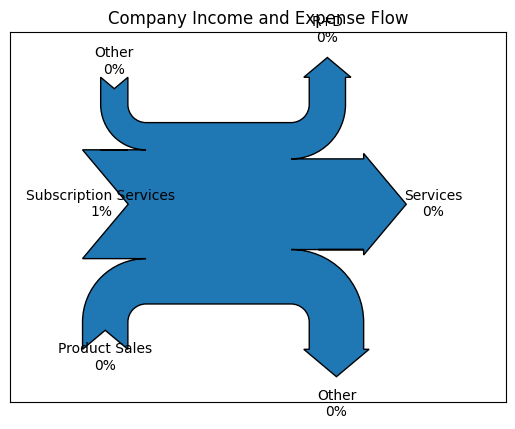

In [23]:
Sankey(flows=[0.25, 0.15, 0.60, -0.20,  -0.30, -0.50],
       labels=['Product Sales', 'Other', 'Subscription Services',  'R+D', 'Other', 'Services'],
       orientations=[-1, 1, 0, 1, -1, 0],
                format='%.0f', unit='%').finish()
plt.title("Company Income and Expense Flow")

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


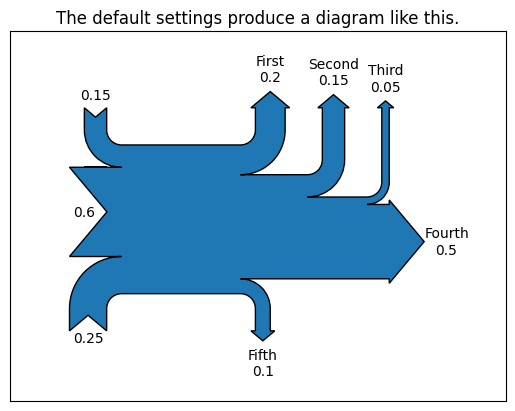

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


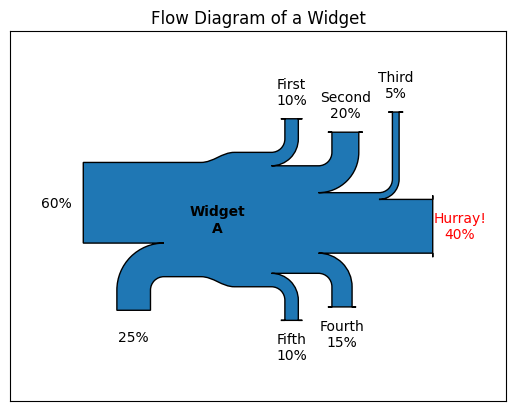

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


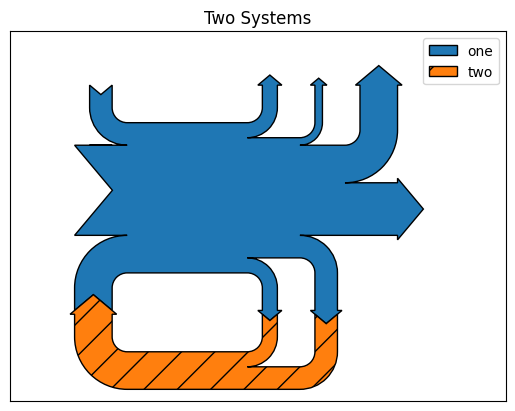

In [14]:

import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

# %%
# Example 1 -- Mostly defaults
#
# This demonstrates how to create a simple diagram by implicitly calling the
# Sankey.add() method and by appending finish() to the call to the class.

Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("The default settings produce a diagram like this.")

# %%
# Notice:
#
# 1. Axes weren't provided when Sankey() was instantiated, so they were
#    created automatically.
# 2. The scale argument wasn't necessary since the data was already
#    normalized.
# 3. By default, the lengths of the paths are justified.


# %%
# Example 2
#
# This demonstrates:
#
# 1. Setting one path longer than the others
# 2. Placing a label in the middle of the diagram
# 3. Using the scale argument to normalize the flows
# 4. Implicitly passing keyword arguments to PathPatch()
# 5. Changing the angle of the arrow heads
# 6. Changing the offset between the tips of the paths and their labels
# 7. Formatting the numbers in the path labels and the associated unit
# 8. Changing the appearance of the patch and the labels after the figure is
#    created

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Flow Diagram of a Widget")
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=180,
                format='%.0f', unit='%')
sankey.add(flows=[25, 0, 60, -10, -20, -5, -15, -10, -40],
           labels=['', '', '', 'First', 'Second', 'Third', 'Fourth',
                   'Fifth', 'Hurray!'],
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0],
           pathlengths=[0.25, 0.25, 0.25, 0.25, 0.25, 0.6, 0.25, 0.25,
                        0.25],
           patchlabel="Widget\nA")  # Arguments to matplotlib.patches.PathPatch
diagrams = sankey.finish()
diagrams[0].texts[-1].set_color('r')
diagrams[0].text.set_fontweight('bold')

# %%
# Notice:
#
# 1. Since the sum of the flows is nonzero, the width of the trunk isn't
#    uniform.  The matplotlib logging system logs this at the DEBUG level.
# 2. The second flow doesn't appear because its value is zero.  Again, this is
#    logged at the DEBUG level.


# %%
# Example 3
#
# This demonstrates:
#
# 1. Connecting two systems
# 2. Turning off the labels of the quantities
# 3. Adding a legend

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")
flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])
sankey.add(flows=[-0.25, 0.15, 0.1], label='two',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend()

# %%
# Notice that only one connection is specified, but the systems form a
# circuit since: (1) the lengths of the paths are justified and (2) the
# orientation and ordering of the flows is mirrored.

plt.show()

